In [1]:
%matplotlib inline

import numpy as np
import random
from scipy.stats import norm
import torch 
import torch.nn as nn 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import QuantileRegressor
import matplotlib.pyplot as plt

seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## Simple NN for XOR

Epoch 0: MSE 0.2504458427429199
Epoch 1: MSE 0.250319242477417
Epoch 2: MSE 0.25020307302474976
Epoch 3: MSE 0.25008898973464966
Epoch 4: MSE 0.24997705221176147
Epoch 5: MSE 0.24986732006072998
Epoch 6: MSE 0.2497597336769104
Epoch 7: MSE 0.24965432286262512
Epoch 8: MSE 0.24955108761787415
Epoch 9: MSE 0.24944984912872314
Epoch 10: MSE 0.24935057759284973
Epoch 11: MSE 0.24925321340560913
Epoch 12: MSE 0.24915751814842224
Epoch 13: MSE 0.24906344711780548
Epoch 14: MSE 0.24897067248821259
Epoch 15: MSE 0.2488791048526764
Epoch 16: MSE 0.24878855049610138
Epoch 17: MSE 0.24869877099990845
Epoch 18: MSE 0.24860958755016327
Epoch 19: MSE 0.24852079153060913
Epoch 20: MSE 0.2484321892261505
Epoch 21: MSE 0.24834367632865906
Epoch 22: MSE 0.24825513362884521
Epoch 23: MSE 0.24816641211509705
Epoch 24: MSE 0.2480774074792862
Epoch 25: MSE 0.2479880303144455
Epoch 26: MSE 0.24789822101593018
Epoch 27: MSE 0.24780802428722382
Epoch 28: MSE 0.24771730601787567
Epoch 29: MSE 0.2476261109113693

Epoch 373: MSE 0.16853809356689453
Epoch 374: MSE 0.1682455837726593
Epoch 375: MSE 0.1679629385471344
Epoch 376: MSE 0.16768211126327515
Epoch 377: MSE 0.1673959195613861
Epoch 378: MSE 0.16710317134857178
Epoch 379: MSE 0.16681325435638428
Epoch 380: MSE 0.16652998328208923
Epoch 381: MSE 0.16623711585998535
Epoch 382: MSE 0.16595390439033508
Epoch 383: MSE 0.16566279530525208
Epoch 384: MSE 0.16540533304214478
Epoch 385: MSE 0.16511744260787964
Epoch 386: MSE 0.1648072600364685
Epoch 387: MSE 0.164524108171463
Epoch 388: MSE 0.16423305869102478
Epoch 389: MSE 0.16396784782409668
Epoch 390: MSE 0.163687601685524
Epoch 391: MSE 0.16338370740413666
Epoch 392: MSE 0.163092702627182
Epoch 393: MSE 0.1628081053495407
Epoch 394: MSE 0.1625348925590515
Epoch 395: MSE 0.16225111484527588
Epoch 396: MSE 0.1619553565979004
Epoch 397: MSE 0.1616753786802292
Epoch 398: MSE 0.16138942539691925
Epoch 399: MSE 0.16110248863697052
Epoch 400: MSE 0.16081449389457703
Epoch 401: MSE 0.1605260968208313


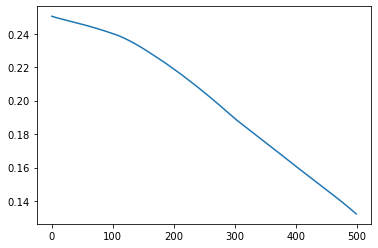

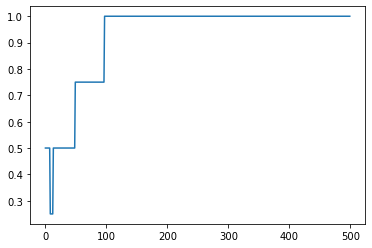

In [2]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float) # Note that these are torch tensors instead of numpy arrays
y = torch.tensor([[0],[1],[1],[0]],dtype=torch.float)

class NN_XOR(nn.Module):
    def __init__(self): #Initialize the neural network
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16), # 2 inputs (x1,x2) connecting to 16 hidden nodes
            nn.ReLU(), # activation function is ReLU
            nn.Linear(16, 1), # single output
            nn.Sigmoid(), # sigmoid activation to represent a probability
        )

    def forward(self, x): #Describe how the model is calculated (for us no other processing required beyond the neural network)
        output = self.model(x)
        return output
    
model = NN_XOR() #Instantiate the neural network

# State the loss function and optimizer (adam is a good choice usually)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss() #use mean squared error for loss function

EPOCHS = 500
losses = np.zeros(EPOCHS)
accuracy = np.zeros(EPOCHS)
for epoch in range(EPOCHS):
    model.zero_grad() # In PyTorch you need to run this first to avoid accumulating gradients
    output = model(X) # Compute the output of the neural network
    loss = loss_function(output, y) # Compute the loss
    loss.backward() # Compute the gradients
    optimizer.step() # Update the weights
    print("Epoch %s: MSE %s" % (epoch,loss.item()))
    losses[epoch] = loss.item()
    accuracy[epoch] = torch.mean(((output > 0.5)+0 == y).float()).item()
    
# View improvement over epochs
plt.plot(losses)
plt.show()
plt.plot(accuracy)
plt.show()

In [3]:
prob = model(X) # Make predictions
pred = (prob > 0.5) + 0
#Evaluate the accuracy
print(torch.mean((pred == y).float()).item()) # Accuracy
# Since this is training data, compare with the final training accuracy
print(accuracy[-1])
print(confusion_matrix(y_pred=pred , y_true=y)) # Confusion matrix

1.0
1.0
[[2 0]
 [0 2]]


In [4]:
# Go back to cell 2 and consider other network structures
# What are the mathematical formulations for these structures?

## In case you want to save or load a model
#torch.save(model,'path/to/location')
#model = torch.load('path/to/location')

## Quadratic example

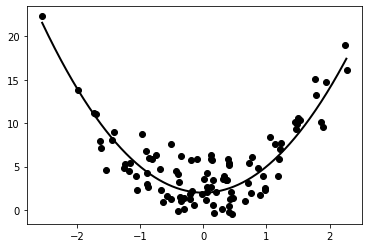

In [5]:
## Nonlinear relationship
N = 100
x = np.random.normal(loc=0,scale=1,size=N)
epsilon = np.random.normal(loc=0,scale=2,size=N)
B0 = 2
B2 = 3
y = B0 + B2*x**2 + epsilon

x_test = np.arange(start=min(x),stop=max(x),step=0.01)
y_true = B0 + B2*x_test**2

plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)

[5.186119764825533, 0.6038827765590936]
39.170752850914766


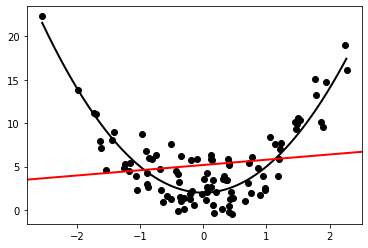

In [6]:
# Run a linear regression
xx = np.vstack([np.ones(len(x)),x]).T
b0,b1 = np.linalg.lstsq(xx,y,rcond=None)[0]
print([b0,b1])

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.axline((0,b0),slope=b1,color='r',linewidth=2)

# Compute MSE
print(np.mean(((b0+b1*x_test) - y_true)**2))

[2.285403016394543, 0.24606187756532572, 2.8664968957338606]
0.21109979792017386


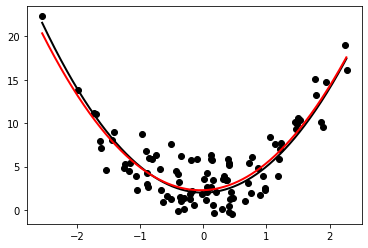

In [7]:
# Run a quadratic regression (since we know this is the ground truth)
xx = np.vstack([np.ones(len(x)),x,x**2]).T
b0,b1,b2 = np.linalg.lstsq(xx,y,rcond=None)[0]
print([b0,b1,b2])

# Predict on test data
y_quad = b0 + b1*x_test + b2*x_test**2

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)

# Compute MSE
print(np.mean((y_quad - y_true)**2))

Epoch 0: MSE 48.080284118652344
Epoch 1: MSE 47.96180725097656
Epoch 2: MSE 47.843631744384766
Epoch 3: MSE 47.72575378417969
Epoch 4: MSE 47.60817337036133
Epoch 5: MSE 47.49089431762695
Epoch 6: MSE 47.37391662597656
Epoch 7: MSE 47.257225036621094
Epoch 8: MSE 47.14083480834961
Epoch 9: MSE 47.024715423583984
Epoch 10: MSE 46.908870697021484
Epoch 11: MSE 46.79331588745117
Epoch 12: MSE 46.678016662597656
Epoch 13: MSE 46.5629997253418
Epoch 14: MSE 46.448246002197266
Epoch 15: MSE 46.333770751953125
Epoch 16: MSE 46.21955108642578
Epoch 17: MSE 46.105587005615234
Epoch 18: MSE 45.991878509521484
Epoch 19: MSE 45.878414154052734
Epoch 20: MSE 45.76515197753906
Epoch 21: MSE 45.652137756347656
Epoch 22: MSE 45.53936004638672
Epoch 23: MSE 45.426822662353516
Epoch 24: MSE 45.314510345458984
Epoch 25: MSE 45.20243835449219
Epoch 26: MSE 45.09059143066406
Epoch 27: MSE 44.978946685791016
Epoch 28: MSE 44.867523193359375
Epoch 29: MSE 44.756324768066406
Epoch 30: MSE 44.64533996582031
Ep

Epoch 416: MSE 12.045668601989746
Epoch 417: MSE 12.00564193725586
Epoch 418: MSE 11.965943336486816
Epoch 419: MSE 11.926563262939453
Epoch 420: MSE 11.8875093460083
Epoch 421: MSE 11.848776817321777
Epoch 422: MSE 11.810367584228516
Epoch 423: MSE 11.772278785705566
Epoch 424: MSE 11.73451042175293
Epoch 425: MSE 11.697057723999023
Epoch 426: MSE 11.659920692443848
Epoch 427: MSE 11.623063087463379
Epoch 428: MSE 11.58651351928711
Epoch 429: MSE 11.550271034240723
Epoch 430: MSE 11.514333724975586
Epoch 431: MSE 11.478684425354004
Epoch 432: MSE 11.443337440490723
Epoch 433: MSE 11.408291816711426
Epoch 434: MSE 11.37354850769043
Epoch 435: MSE 11.339102745056152
Epoch 436: MSE 11.304956436157227
Epoch 437: MSE 11.27110481262207
Epoch 438: MSE 11.237547874450684
Epoch 439: MSE 11.204288482666016
Epoch 440: MSE 11.171318054199219
Epoch 441: MSE 11.138641357421875
Epoch 442: MSE 11.106250762939453
Epoch 443: MSE 11.074150085449219
Epoch 444: MSE 11.042336463928223
Epoch 445: MSE 11.010

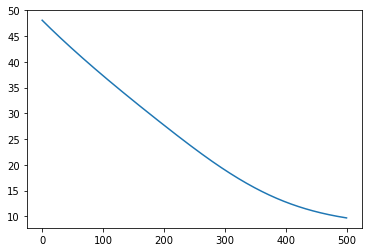

18.026303575616684


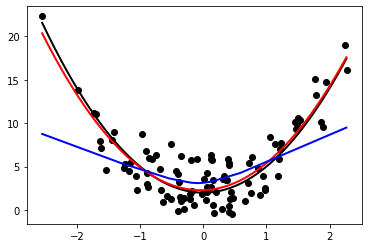

In [8]:
# Consider a neural network
# What is the shape of this network?
HIDDEN = 16
class NN(nn.Module):
    def __init__(self): #Initialize the neural network
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, HIDDEN), # 1 input x
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, 1), # 1 output y
        )

    def forward(self, x): #Describe how the model is calculated (for us no other processing required beyond the neural network)
        output = self.model(x)
        return output

model = NN() #Instantiate the neural network

# State the loss function and optimizer (adam is a good choice usually)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss() #use mean squared error for loss function


# Fit the model to training data
EPOCHS = 500
losses = np.zeros(EPOCHS)
X = torch.tensor(np.reshape(x,(N,1)),dtype=torch.float)
Y = torch.tensor(np.reshape(y,(N,1)),dtype=torch.float)
for epoch in range(EPOCHS):
    model.zero_grad() # In PyTorch you need to run this first to avoid accumulating gradients
    output = model(X) # Compute the output of the neural network
    loss = loss_function(output, Y) # Compute the loss
    loss.backward() # Compute the gradients
    optimizer.step() # Update the weights
    print("Epoch %s: MSE %s" % (epoch,loss.item()))
    losses[epoch] = loss.item()

# View improvement over epochs
plt.plot(losses)
plt.show()

# Make predictions on the test data
X_test = torch.tensor(np.reshape(x_test,(x_test.size,1)),dtype=torch.float)
y_NN = model(X_test).detach().numpy() # Note the .detach().numpy() to convert to numpy array
y_NN = np.reshape(y_NN , (x_test.size,))

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)
plt.plot(x_test,y_NN,color='b',linewidth=2)

# Compute test MSE
print(np.mean((y_NN - y_true)**2))


Epoch 0: MSE 46.00230026245117
Epoch 1: MSE 45.82978820800781
Epoch 2: MSE 45.657554626464844
Epoch 3: MSE 45.48561096191406
Epoch 4: MSE 45.31391906738281
Epoch 5: MSE 45.14247512817383
Epoch 6: MSE 44.97123718261719
Epoch 7: MSE 44.800174713134766
Epoch 8: MSE 44.629249572753906
Epoch 9: MSE 44.45840835571289
Epoch 10: MSE 44.28764724731445
Epoch 11: MSE 44.1169548034668
Epoch 12: MSE 43.94633865356445
Epoch 13: MSE 43.775794982910156
Epoch 14: MSE 43.60532760620117
Epoch 15: MSE 43.43490219116211
Epoch 16: MSE 43.264495849609375
Epoch 17: MSE 43.0941276550293
Epoch 18: MSE 42.92375564575195
Epoch 19: MSE 42.753395080566406
Epoch 20: MSE 42.583011627197266
Epoch 21: MSE 42.41258239746094
Epoch 22: MSE 42.24208450317383
Epoch 23: MSE 42.07148742675781
Epoch 24: MSE 41.90077209472656
Epoch 25: MSE 41.72989273071289
Epoch 26: MSE 41.5588264465332
Epoch 27: MSE 41.387569427490234
Epoch 28: MSE 41.21607971191406
Epoch 29: MSE 41.04432678222656
Epoch 30: MSE 40.872276306152344
Epoch 31: MS

Epoch 356: MSE 14.476035118103027
Epoch 357: MSE 14.45281982421875
Epoch 358: MSE 14.42955207824707
Epoch 359: MSE 14.406232833862305
Epoch 360: MSE 14.382861137390137
Epoch 361: MSE 14.359444618225098
Epoch 362: MSE 14.335980415344238
Epoch 363: MSE 14.312477111816406
Epoch 364: MSE 14.28890609741211
Epoch 365: MSE 14.265277862548828
Epoch 366: MSE 14.241596221923828
Epoch 367: MSE 14.217870712280273
Epoch 368: MSE 14.194099426269531
Epoch 369: MSE 14.170270919799805
Epoch 370: MSE 14.146452903747559
Epoch 371: MSE 14.122559547424316
Epoch 372: MSE 14.098610877990723
Epoch 373: MSE 14.074662208557129
Epoch 374: MSE 14.050670623779297
Epoch 375: MSE 14.026644706726074
Epoch 376: MSE 14.002596855163574
Epoch 377: MSE 13.978507041931152
Epoch 378: MSE 13.954388618469238
Epoch 379: MSE 13.930275917053223
Epoch 380: MSE 13.906137466430664
Epoch 381: MSE 13.881975173950195
Epoch 382: MSE 13.85778522491455
Epoch 383: MSE 13.833551406860352
Epoch 384: MSE 13.80929183959961
Epoch 385: MSE 13.7

Epoch 624: MSE 9.40237808227539
Epoch 625: MSE 9.39035415649414
Epoch 626: MSE 9.378347396850586
Epoch 627: MSE 9.36625862121582
Epoch 628: MSE 9.354063987731934
Epoch 629: MSE 9.341861724853516
Epoch 630: MSE 9.329643249511719
Epoch 631: MSE 9.317392349243164
Epoch 632: MSE 9.305135726928711
Epoch 633: MSE 9.293006896972656
Epoch 634: MSE 9.280895233154297
Epoch 635: MSE 9.268686294555664
Epoch 636: MSE 9.256072044372559
Epoch 637: MSE 9.243509292602539
Epoch 638: MSE 9.230737686157227
Epoch 639: MSE 9.217930793762207
Epoch 640: MSE 9.205280303955078
Epoch 641: MSE 9.19264030456543
Epoch 642: MSE 9.179994583129883
Epoch 643: MSE 9.167346000671387
Epoch 644: MSE 9.154500961303711
Epoch 645: MSE 9.141766548156738
Epoch 646: MSE 9.129034996032715
Epoch 647: MSE 9.116303443908691
Epoch 648: MSE 9.10356616973877
Epoch 649: MSE 9.09079360961914
Epoch 650: MSE 9.07815170288086
Epoch 651: MSE 9.065654754638672
Epoch 652: MSE 9.053196907043457
Epoch 653: MSE 9.040761947631836
Epoch 654: MSE 9.

Epoch 961: MSE 6.61688232421875
Epoch 962: MSE 6.611225605010986
Epoch 963: MSE 6.605581283569336
Epoch 964: MSE 6.599949359893799
Epoch 965: MSE 6.594332695007324
Epoch 966: MSE 6.5887274742126465
Epoch 967: MSE 6.583145618438721
Epoch 968: MSE 6.577580451965332
Epoch 969: MSE 6.572028160095215
Epoch 970: MSE 6.566429615020752
Epoch 971: MSE 6.560796737670898
Epoch 972: MSE 6.555166244506836
Epoch 973: MSE 6.549538612365723
Epoch 974: MSE 6.5439133644104
Epoch 975: MSE 6.538294792175293
Epoch 976: MSE 6.532681941986084
Epoch 977: MSE 6.527074813842773
Epoch 978: MSE 6.521474838256836
Epoch 979: MSE 6.5158514976501465
Epoch 980: MSE 6.510195255279541
Epoch 981: MSE 6.50454044342041
Epoch 982: MSE 6.498889923095703
Epoch 983: MSE 6.493241786956787
Epoch 984: MSE 6.487600326538086
Epoch 985: MSE 6.481964588165283
Epoch 986: MSE 6.4763360023498535
Epoch 987: MSE 6.470714569091797
Epoch 988: MSE 6.4651031494140625
Epoch 989: MSE 6.459498882293701
Epoch 990: MSE 6.45390510559082
Epoch 991: 

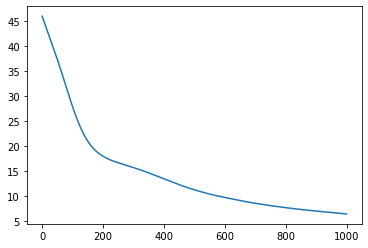

8.183736999436004
tensor(8.1837, grad_fn=<MseLossBackward0>)


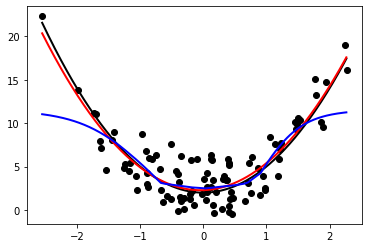

In [9]:
# How about a *deep* neural network
# What is the structure of this neural network?
# Consider a neural network
# What is the shape of this network?
HIDDEN = 16
class NN(nn.Module):
    def __init__(self): #Initialize the neural network
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, HIDDEN), # 1 input x
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, HIDDEN),
            nn.Tanh(), # activation function is tanh
            nn.Linear(HIDDEN, 1), # 1 output y
        )

    def forward(self, x): #Describe how the model is calculated (for us no other processing required beyond the neural network)
        output = self.model(x)
        return output

model = NN() #Instantiate the neural network

# State the loss function and optimizer (adam is a good choice usually)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss() #use mean squared error for loss function


# Fit the model to training data
EPOCHS = 1000
losses = np.zeros(EPOCHS)
X = torch.tensor(np.reshape(x,(N,1)),dtype=torch.float)
Y = torch.tensor(np.reshape(y,(N,1)),dtype=torch.float)
for epoch in range(EPOCHS):
    model.zero_grad() # In PyTorch you need to run this first to avoid accumulating gradients
    output = model(X) # Compute the output of the neural network
    loss = loss_function(output, Y) # Compute the loss
    loss.backward() # Compute the gradients
    optimizer.step() # Update the weights
    print("Epoch %s: MSE %s" % (epoch,loss.item()))
    losses[epoch] = loss.item()

# View improvement over epochs
plt.plot(losses)
plt.show()

# Make predictions on the test data
X_test = torch.tensor(np.reshape(x_test,(x_test.size,1)),dtype=torch.float)
y_NN = model(X_test)

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)
plt.plot(x_test,y_NN.detach().numpy(),color='b',linewidth=2) # Note the .detach().numpy() to convert to numpy array

# Compute test MSE
print(np.mean((np.reshape(y_NN.detach().numpy(),(x_test.size,)) - y_true)**2))
print(loss_function(y_NN , torch.tensor(np.reshape(y_true,(len(y_true),1)),dtype=torch.float)))

# Let's go back and consider other network structures
# What are the mathematical formulations for these structures?

## Quantile regression (changing the loss function)

(-0.27281268967384475, array([-0.08657815,  2.80852425]))


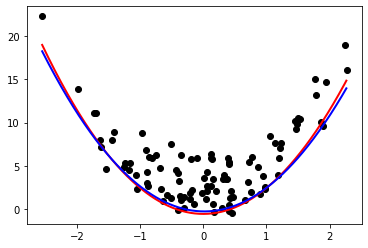

In [10]:
# Consider the 10% quantile
# Test/plot fits
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true+norm.ppf(0.1,scale=2),color='r',linewidth=2)

# Run a quadratic quantile regression (since we know this is the ground truth)
quad_reg = QuantileRegressor(quantile=0.1, alpha=0) #alpha is for a Lasso-type penalty term
X = np.transpose(np.vstack((x,x**2)))
quad_reg.fit(X, y)
print((quad_reg.intercept_ , quad_reg.coef_))

X_test = np.transpose(np.vstack((x_test,x_test**2)))
y_quad_pred = quad_reg.predict(X_test)
plt.plot(x_test,y_quad_pred,color='b',linewidth=2)

Epoch 0: MSE 0.5306635499000549
Epoch 1: MSE 0.5298704504966736
Epoch 2: MSE 0.5290626883506775
Epoch 3: MSE 0.5282461047172546
Epoch 4: MSE 0.5274266004562378
Epoch 5: MSE 0.5266155004501343
Epoch 6: MSE 0.525799036026001
Epoch 7: MSE 0.5249796509742737
Epoch 8: MSE 0.5241671800613403
Epoch 9: MSE 0.5234453678131104
Epoch 10: MSE 0.5227667093276978
Epoch 11: MSE 0.5220881104469299
Epoch 12: MSE 0.5214027166366577
Epoch 13: MSE 0.520728349685669
Epoch 14: MSE 0.5200437307357788
Epoch 15: MSE 0.519355833530426
Epoch 16: MSE 0.5186587572097778
Epoch 17: MSE 0.517957329750061
Epoch 18: MSE 0.5172669887542725
Epoch 19: MSE 0.5165759325027466
Epoch 20: MSE 0.5158851146697998
Epoch 21: MSE 0.5151966214179993
Epoch 22: MSE 0.5145073533058167
Epoch 23: MSE 0.5138129591941833
Epoch 24: MSE 0.5131157040596008
Epoch 25: MSE 0.5124176740646362
Epoch 26: MSE 0.511715829372406
Epoch 27: MSE 0.5110114812850952
Epoch 28: MSE 0.5102982521057129
Epoch 29: MSE 0.5095773339271545
Epoch 30: MSE 0.508849561

Epoch 324: MSE 0.32388541102409363
Epoch 325: MSE 0.3235681653022766
Epoch 326: MSE 0.32324790954589844
Epoch 327: MSE 0.3229230046272278
Epoch 328: MSE 0.3225744664669037
Epoch 329: MSE 0.3222058415412903
Epoch 330: MSE 0.32192572951316833
Epoch 331: MSE 0.3216482400894165
Epoch 332: MSE 0.3213379681110382
Epoch 333: MSE 0.3209982216358185
Epoch 334: MSE 0.320734441280365
Epoch 335: MSE 0.32045525312423706
Epoch 336: MSE 0.3201614022254944
Epoch 337: MSE 0.31987541913986206
Epoch 338: MSE 0.31961551308631897
Epoch 339: MSE 0.3193502128124237
Epoch 340: MSE 0.3190957307815552
Epoch 341: MSE 0.31884142756462097
Epoch 342: MSE 0.3185842037200928
Epoch 343: MSE 0.3183143138885498
Epoch 344: MSE 0.31804224848747253
Epoch 345: MSE 0.31779944896698
Epoch 346: MSE 0.3175288736820221
Epoch 347: MSE 0.3172517716884613
Epoch 348: MSE 0.31702354550361633
Epoch 349: MSE 0.31673669815063477
Epoch 350: MSE 0.31646037101745605
Epoch 351: MSE 0.3161739706993103
Epoch 352: MSE 0.31590598821640015
Epoch

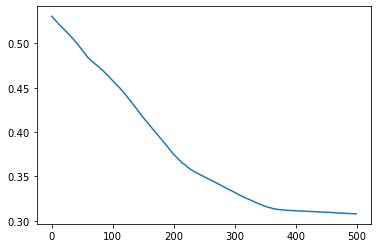

In [11]:
HIDDEN = 16
class NN_Reg(nn.Module):
    def __init__(self): #Initialize the neural network
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, HIDDEN), # 1 input x
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, HIDDEN),
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, 1), # 1 output y
        )

    def forward(self, x): #Describe how the model is calculated (for us no other processing required beyond the neural network)
        output = self.model(x)
        return output

model = NN_Reg() #Instantiate the neural network

# State the loss function and optimizer (adam is a good choice usually)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def quantile_loss(q):
    def ql(y_pred , y_true):
        e = y_true - y_pred
        #if e > 0 then qe > (q-1)e; if e < 0 then qe < (q-1)e
        loss = torch.mean(torch.maximum(q*e , (q-1)*e))
        return loss
    
    return ql

loss_function = quantile_loss(0.1) #use custom loss function


# Fit the model to training data
EPOCHS = 500
losses = np.zeros(EPOCHS)
X = torch.tensor(np.reshape(x,(N,1)),dtype=torch.float)
Y = torch.tensor(np.reshape(y,(N,1)),dtype=torch.float)
for epoch in range(EPOCHS):
    model.zero_grad() # In PyTorch you need to run this first to avoid accumulating gradients
    output = model(X) # Compute the output of the neural network
    loss = loss_function(output, Y) # Compute the loss
    loss.backward() # Compute the gradients
    optimizer.step() # Update the weights
    print("Epoch %s: MSE %s" % (epoch,loss.item()))
    losses[epoch] = loss.item()

# View improvement over epochs
plt.plot(losses)
plt.show()

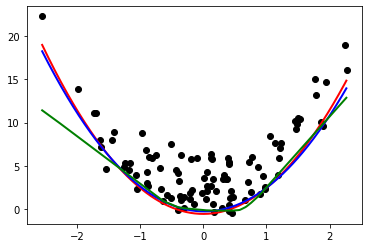

In [12]:
# Predict with the neural network
X_test = torch.tensor(np.reshape(x_test,(x_test.size,1)),dtype=torch.float)
y_nn_pred = model(X_test)
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true+norm.ppf(0.1,scale=2),color='r',linewidth=2)
plt.plot(x_test,y_quad_pred,color='b',linewidth=2)
plt.plot(x_test,y_nn_pred.detach().numpy(),color='g',linewidth=2)

## Feedforward NN for financial data

[*********************100%***********************]  1 of 1 completed
Epoch 0: MSE 0.023642634972929955 + Validation 0.01981678232550621
Epoch 1: MSE 0.01980869099497795 + Validation 0.016378726810216904
Epoch 2: MSE 0.01636691577732563 + Validation 0.013300462625920773
Epoch 3: MSE 0.013282139785587788 + Validation 0.010585817508399487
Epoch 4: MSE 0.01056043989956379 + Validation 0.008251314051449299
Epoch 5: MSE 0.00821952149271965 + Validation 0.0062718819826841354
Epoch 6: MSE 0.006237891502678394 + Validation 0.004610716365277767
Epoch 7: MSE 0.004573623184114695 + Validation 0.0032493218313902617
Epoch 8: MSE 0.003208056790754199 + Validation 0.002171582542359829
Epoch 9: MSE 0.0021253537852317095 + Validation 0.0013577122008427978
Epoch 10: MSE 0.0013064476661384106 + Validation 0.0007845172076486051
Epoch 11: MSE 0.0007282992592081428 + Validation 0.00043253839248791337
Epoch 12: MSE 0.00037234893534332514 + Validation 0.0002556461258791387
Epoch 13: MSE 0.00019180266826879233 

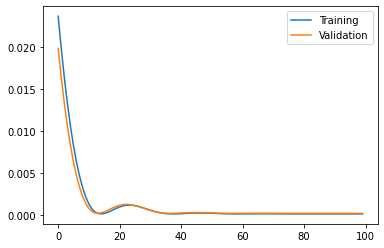

0.00014080674736760557
0.00020835922623518854
0.00043907540384680033


In [13]:
# Download financial data:
import yfinance
from datetime import datetime

#myData = DataReader(["IBM"],"yahoo",datetime(2010,1,1),datetime(2021,12,31)) #IBM chosen at random
#IBM = myData["Adj Close"]["IBM"]
myData = yfinance.download(["IBM"],datetime(2010,1,1),datetime(2021,12,31))
IBM = myData["Adj Close"]

r = np.log(IBM) - np.log(IBM.shift(1)) # Daily log return
r = r.to_numpy()
r = np.delete(r , 0) # Remove first date because 1 lag in returns

train_X = r[0:2500]
test_X = r[2500:3018]
train_y = r[1:2501]
test_y = r[2501:3019]


# Construct neural network
HIDDEN = 16
class NN(nn.Module):
    def __init__(self): #Initialize the neural network
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, HIDDEN), # 1 input x
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, HIDDEN),
            nn.ReLU(), # activation function is ReLU
            nn.Linear(HIDDEN, 1), # 1 output y
        )

    def forward(self, x): #Describe how the model is calculated (for us no other processing required beyond the neural network)
        output = self.model(x)
        return output

model = NN() #Instantiate the neural network

# State the loss function and optimizer (adam is a good choice usually)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss() #use mean squared error for loss function


# Fit the model to training data
# Let's do a validation step as well
EPOCHS = 100
losses = np.zeros(EPOCHS)
val_losses = np.zeros(EPOCHS)
X = torch.tensor(np.reshape(train_X,(2500,1)),dtype=torch.float)
Y = torch.tensor(np.reshape(train_y,(2500,1)),dtype=torch.float)
for epoch in range(EPOCHS):
    model.zero_grad() # In PyTorch you need to run this first to avoid accumulating gradients
    output = model(X[0:2000,]) # Compute the output of the neural network
    loss = loss_function(output, Y[0:2000,]) # Compute the loss
    loss.backward() # Compute the gradients
    optimizer.step() # Update the weights
    
    #Include Validation
    val_loss = loss_function(model(X[2000:2500,]) , Y[2000:2500,])
    print("Epoch %s: MSE %s + Validation %s" % (epoch,loss.item(),val_loss.item()))
    losses[epoch] = loss.item()
    val_losses[epoch] = val_loss.item()
    

# View improvement over epochs
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['Training','Validation'])
plt.show()
print(losses[-1]) # Training MSE
print(val_losses[-1]) # Validation loss

# Evaluate on test data
X_test = torch.tensor(np.reshape(test_X,(test_X.size,1)),dtype=torch.float)
print(loss_function(model(X_test) , torch.tensor(np.reshape(test_y,(len(test_y),1)),dtype=torch.float)).item())

In [14]:
# How does this compare with an AR(1) model
XX = np.vstack([np.ones(len(train_X)),train_X]).T
b0,b1 = np.linalg.lstsq(XX,train_y,rcond=None)[0]

# Compute MSE
print(np.mean(((b0+b1*test_X) - test_y)**2))


# How should we modify this NN to consider 2+ lags?
# What other network structures should we try?

0.0004314154946894988
